/tmp/ipykernel_58/3111852835.py:26: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  r1=sci.array(r1,dtype="float64")
/tmp/ipykernel_58/3111852835.py:27: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  r2=sci.array(r2,dtype="float64")
/tmp/ipykernel_58/3111852835.py:34: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  v1=sci.array(v1,dtype="float64")
/tmp/ipykernel_58/3111852835.py:35: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  v2=sci.array(v2,dtype="float64")
/tmp/ipykernel_58/3111852835.py:55: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  init_params=sci.array([r1,r2,v1,v2]) #create array of initial params
/tmp/ipykernel_58/3111852835.py:57: DeprecationWarning: scipy.linspace is depre

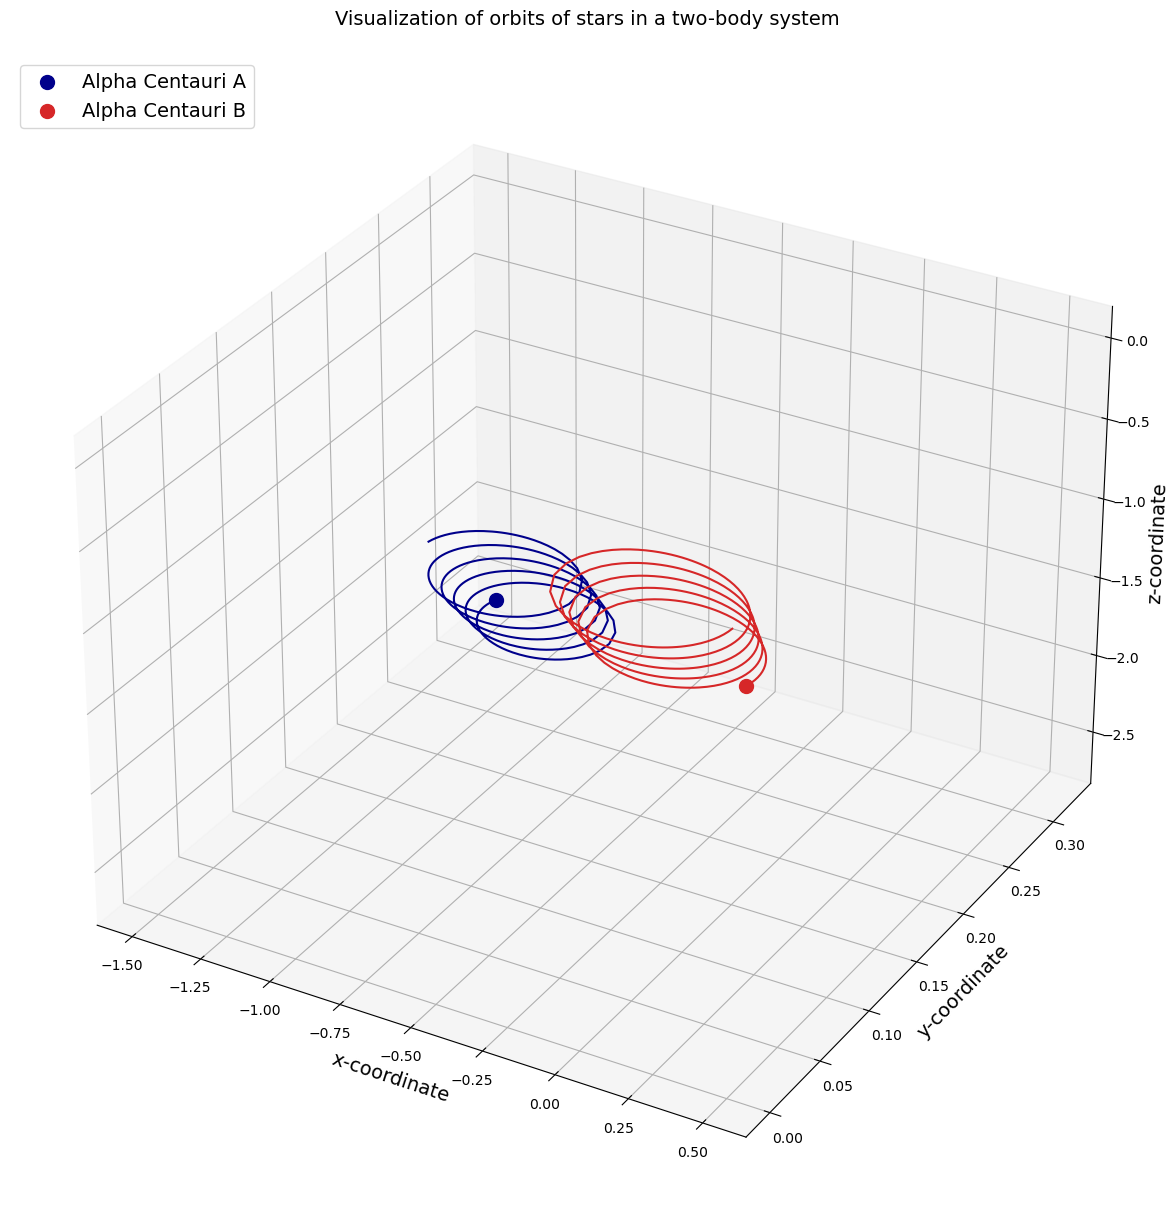

In [8]:
#Import scipy
import scipy as sci
#Import matplotlib and associated modules for 3D and animations
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

#Define universal gravitation constant
G=6.67408e-11 #N-m2/kg2
#Reference quantities
m_nd=1.989e+30 #kg #mass of the sun
r_nd=5.326e+12 #m #distance between stars in Alpha Centauri
v_nd=30000 #m/s #relative velocity of earth around the sun
t_nd=79.91*365*24*3600*0.51 #s #orbital period of Alpha Centauri
#Net constants
K1=G*t_nd*m_nd/(r_nd**2*v_nd)
K2=v_nd*t_nd/r_nd

#Define masses
m1=1.1 #Alpha Centauri A
m2=0.907 #Alpha Centauri B
#Define initial position vectors
r1=[-0.5,0,0] #m
r2=[0.5,0,0] #m
#Convert pos vectors to arrays
r1=sci.array(r1,dtype="float64")
r2=sci.array(r2,dtype="float64")
#Find Centre of Mass
r_com=(m1*r1+m2*r2)/(m1+m2)
#Define initial velocities
v1=[0.01,0.01,0] #m/s
v2=[-0.05,0,-0.1] #m/s
#Convert velocity vectors to arrays
v1=sci.array(v1,dtype="float64")
v2=sci.array(v2,dtype="float64")
#Find velocity of COM
v_com=(m1*v1+m2*v2)/(m1+m2)

#A function defining the equations of motion 
def TwoBodyEquations(w,t,G,m1,m2):
    r1=w[:3]
    r2=w[3:6]
    v1=w[6:9]
    v2=w[9:12]
    r=sci.linalg.norm(r2-r1) #Calculate magnitude or norm of vector
    dv1bydt=K1*m2*(r2-r1)/r**3
    dv2bydt=K1*m1*(r1-r2)/r**3
    dr1bydt=K2*v1
    dr2bydt=K2*v2
    r_derivs=sci.concatenate((dr1bydt,dr2bydt))
    derivs=sci.concatenate((r_derivs,dv1bydt,dv2bydt))
    return derivs

#Package initial parameters
init_params=sci.array([r1,r2,v1,v2]) #create array of initial params
init_params=init_params.flatten() #flatten array to make it 1D
time_span=sci.linspace(0,8,500) #8 orbital periods and 500 points

#Run the ODE solver
import scipy.integrate
two_body_sol=sci.integrate.odeint(TwoBodyEquations,init_params,time_span,args=(G,m1,m2))

r1_sol=two_body_sol[:,:3]
r2_sol=two_body_sol[:,3:6]

#Create figure
fig=plt.figure(figsize=(15,15))
#Create 3D axes
ax=fig.add_subplot(111,projection="3d")
#Plot the orbits
ax.plot(r1_sol[:,0],r1_sol[:,1],r1_sol[:,2],color="darkblue")
ax.plot(r2_sol[:,0],r2_sol[:,1],r2_sol[:,2],color="tab:red")
#Plot the final positions of the stars
ax.scatter(r1_sol[-1,0],r1_sol[-1,1],r1_sol[-1,2],color="darkblue",marker="o",s=100,label="Alpha Centauri A")
ax.scatter(r2_sol[-1,0],r2_sol[-1,1],r2_sol[-1,2],color="tab:red",marker="o",s=100,label="Alpha Centauri B")
#Add a few more bells and whistles
ax.set_xlabel("x-coordinate",fontsize=14)
ax.set_ylabel("y-coordinate",fontsize=14)
ax.set_zlabel("z-coordinate",fontsize=14)
ax.set_title("Visualization of orbits of stars in a two-body system\n",fontsize=14)
ax.legend(loc="upper left",fontsize=14)

/tmp/ipykernel_58/3678064756.py:28: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  r1=sci.array(r1,dtype="float64")
/tmp/ipykernel_58/3678064756.py:29: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  r2=sci.array(r2,dtype="float64")
/tmp/ipykernel_58/3678064756.py:30: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  r3=sci.array(r3,dtype="float64")
/tmp/ipykernel_58/3678064756.py:38: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  v1=sci.array(v1,dtype="float64")
/tmp/ipykernel_58/3678064756.py:39: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  v2=sci.array(v2,dtype="float64")
/tmp/ipykernel_58/3678064756.py:40: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.

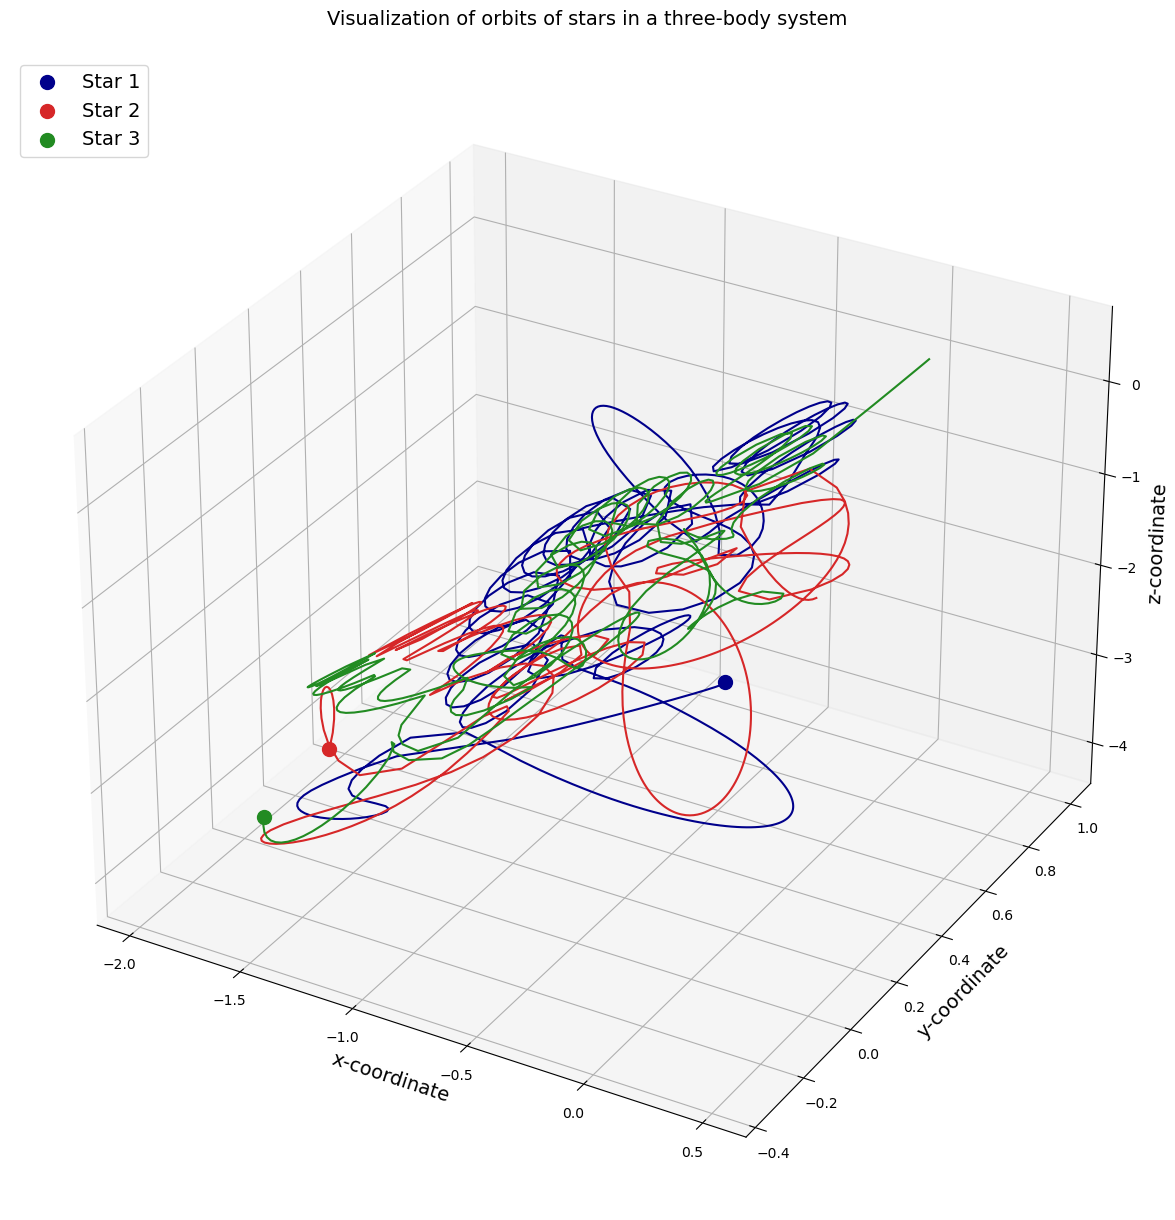

In [43]:
#Import scipy
import scipy as sci
#Import matplotlib and associated modules for 3D and animations
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

#Define universal gravitation constant
G=6.67408e-11 #N-m2/kg2
#Reference quantities
m_nd=1.989e+30 #kg #mass of the sun
r_nd=5.326e+12 #m #distance between stars in Alpha Centauri
v_nd=30000 #m/s #relative velocity of earth around the sun
t_nd=79.91*365*24*3600*0.51 #s #orbital period of Alpha Centauri
#Net constants
K1=G*t_nd*m_nd/(r_nd**2*v_nd)
K2=v_nd*t_nd/r_nd

#Define masses
m1=1.1 #Alpha Centauri A
m2=0.907 #Alpha Centauri B
m3=1.5 #Third body
#Define initial position vectors
r1=[-0.5,0,0] #m
r2=[0.5,0,0] #m
r3=[0,1,0] #m
#Convert pos vectors to arrays
r1=sci.array(r1,dtype="float64")
r2=sci.array(r2,dtype="float64")
r3=sci.array(r3,dtype="float64")
#Find Centre of Mass
r_com=(m1*r1+m2*r2+m3*r3)/(m1+m2+m3)
#Define initial velocities
v1=[0.01,0.01,0] #m/s
v2=[-0.05,0,-0.1] #m/s
v3=[0,-0.01,0] #m/s
#Convert velocity vectors to arrays
v1=sci.array(v1,dtype="float64")
v2=sci.array(v2,dtype="float64")
v3=sci.array(v3,dtype="float64")
#Find velocity of COM
v_com=(m1*v1+m2*v2+m3*v3)/(m1+m2+m3)

#A function defining the equations of motion 
def ThreeBodyEquations(w,t,G,m1,m2,m3):
    r1=w[:3]
    r2=w[3:6]
    r3=w[6:9]
    v1=w[9:12]
    v2=w[12:15]
    v3=w[15:18]
    r12=sci.linalg.norm(r2-r1) #Calculate magnitude or norm of vector
    r13=sci.linalg.norm(r3-r1)
    r23=sci.linalg.norm(r3-r2)
    dv1bydt=K1*(m2*(r2-r1)/r12**3+m3*(r3-r1)/r13**3)
    dv2bydt=K1*(m1*(r1-r2)/r12**3+m3*(r3-r2)/r23**3)
    dv3bydt=K1*(m1*(r1-r3)/r13**3+m2*(r2-r3)/r23**3)
    dr1bydt=K2*v1
    dr2bydt=K2*v2
    dr3bydt=K2*v3
    r_derivs = sci.concatenate((dr1bydt, dr2bydt, dr3bydt))
    derivs = sci.concatenate((r_derivs, dv1bydt, dv2bydt, dv3bydt))
    
    return derivs



#Package initial parameters
init_params=sci.array([r1,r2,r3,v1,v2,v3]) #create array of initial params
init_params=init_params.flatten() #flatten array to make it 1D
time_span=sci.linspace(0,20,500) #20 orbital periods and 500 points
#Splits at 50.1 Alpha Centauri Periods

#Run the ODE solver
import scipy.integrate
three_body_sol=sci.integrate.odeint(ThreeBodyEquations,init_params,time_span,args=(G,m1,m2,m3))

r1_sol=three_body_sol[:,:3]
r2_sol=three_body_sol[:,3:6]
r3_sol=three_body_sol[:,6:9]

#Create figure
fig=plt.figure(figsize=(15,15))
#Create 3D axes
ax=fig.add_subplot(111,projection="3d")
#Plot the orbits
ax.plot(r1_sol[:,0],r1_sol[:,1],r1_sol[:,2],color="darkblue")
ax.plot(r2_sol[:,0],r2_sol[:,1],r2_sol[:,2],color="tab:red")
ax.plot(r3_sol[:,0],r3_sol[:,1],r3_sol[:,2],color="forestgreen")
#Plot the final positions of the stars
ax.scatter(r1_sol[-1,0],r1_sol[-1,1],r1_sol[-1,2],color="darkblue",marker="o",s=100,label="Star 1")
ax.scatter(r2_sol[-1,0],r2_sol[-1,1],r2_sol[-1,2],color="tab:red",marker="o",s=100,label="Star 2")
ax.scatter(r3_sol[-1,0],r3_sol[-1,1],r3_sol[-1,2],color="forestgreen",marker="o",s=100,label="Star 3")
#Add a few more bells and whistles
ax.set_xlabel("x-coordinate",fontsize=14)
ax.set_ylabel("y-coordinate",fontsize=14)
ax.set_zlabel("z-coordinate",fontsize=14)
ax.set_title("Visualization of orbits of stars in a three-body system\n",fontsize=14)
ax.legend(loc="upper left",fontsize=14)

/tmp/ipykernel_58/1258888668.py:37: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  r1=sci.array(r1,dtype="float64")
/tmp/ipykernel_58/1258888668.py:38: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  r2=sci.array(r2,dtype="float64")
/tmp/ipykernel_58/1258888668.py:39: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  r3=sci.array(r3,dtype="float64")
/tmp/ipykernel_58/1258888668.py:47: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  v1=sci.array(v1,dtype="float64")
/tmp/ipykernel_58/1258888668.py:48: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  v2=sci.array(v2,dtype="float64")
/tmp/ipykernel_58/1258888668.py:49: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.

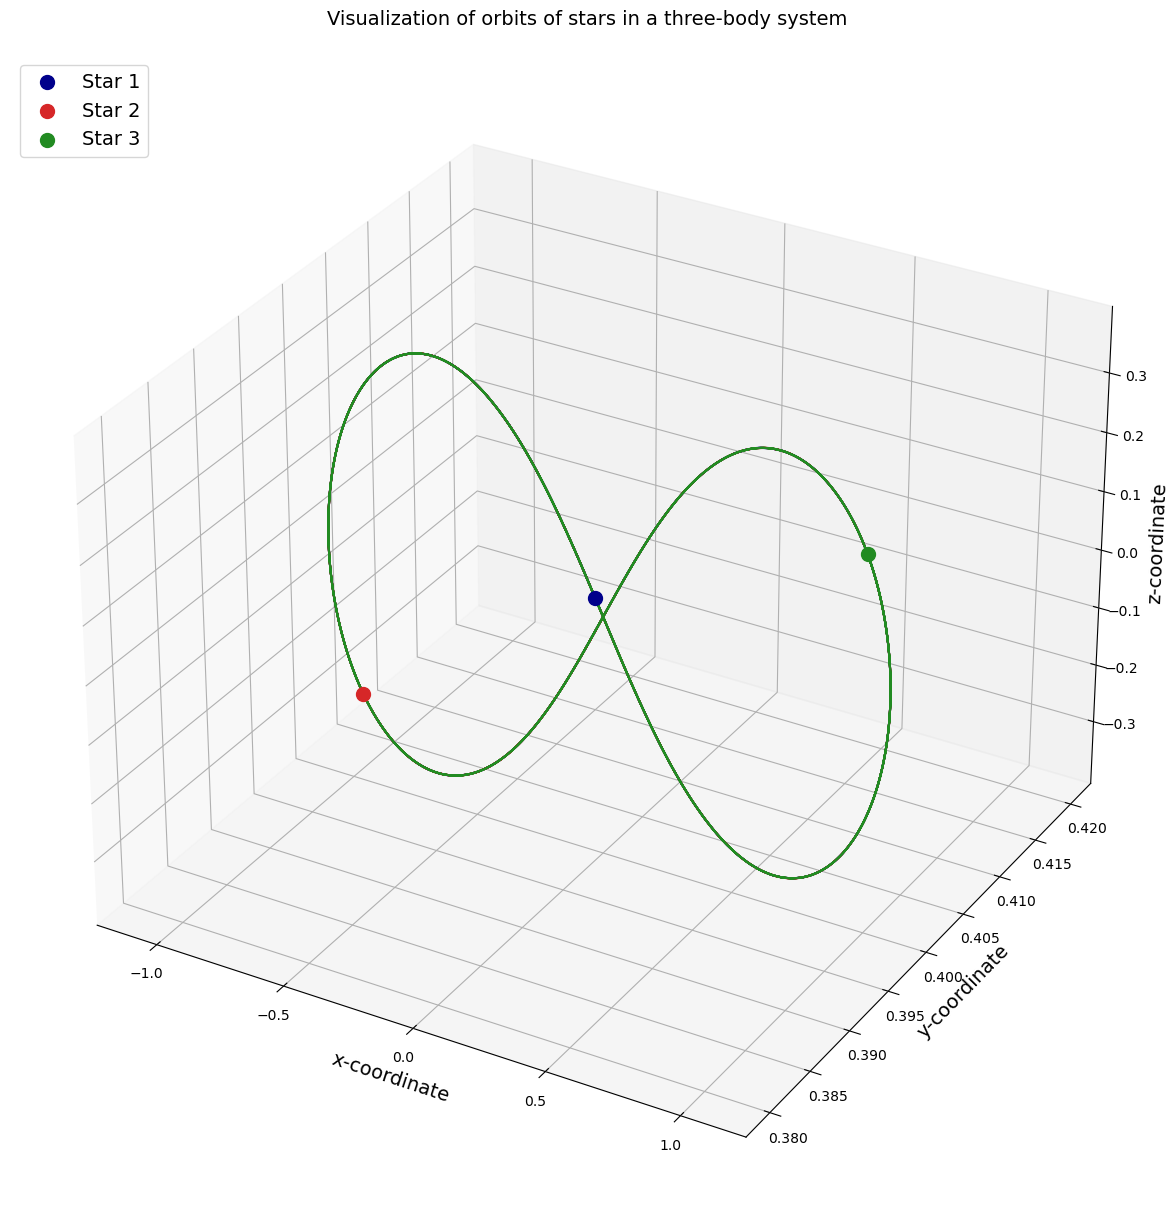

In [28]:
#Import scipy
import scipy as sci
#Import matplotlib and associated modules for 3D and animations
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

#Define universal gravitation constant
G=6.67408e-11 #N-m2/kg2
#Reference quantities
m_nd=1.989e+30 #kg #mass of the sun
r_nd=5.326e+12 #m #distance between stars in Alpha Centauri
v_nd=30000 #m/s #relative velocity of earth around the sun
t_nd=365*24*3600*0.51 #s #orbital period of Alpha Centauri
#Net constants
#K1=G*t_nd*m_nd/(r_nd**2*v_nd)
#K2=v_nd*t_nd/r_nd
K1=1
K2=1

#Here the gravitational constant G has been set to 1, and the initial conditions are 
#r1(0) = −r3(0) = (−0.97000436, 0.24308753) 
#r2(0) = (0,0)
#v1(0) = v3(0) = (0.4662036850, 0.4323657300)
#v2(0) = (−0.93240737, −0.86473146).
#The values are obtained from Chenciner & Montgomery (2000).

#Define masses
m1=1 #Alpha Centauri A
m2=1 #Alpha Centauri B
m3=1 #Third body
#Define initial position vectors
r1=[-0.97000436,0.4, 0.24308753] #m
r2=[0,0.4,0] #m
r3=[0.97000436,0.4, -0.24308753] #m
#Convert pos vectors to arrays
r1=sci.array(r1,dtype="float64")
r2=sci.array(r2,dtype="float64")
r3=sci.array(r3,dtype="float64")
#Find Centre of Mass
r_com=(m1*r1+m2*r2+m3*r3)/(m1+m2+m3)
#Define initial velocities
v1=[0.4662036850,0,0.4323657300] #m/s
v2=[-0.93240737, 0,-0.86473146] #m/s
v3=[0.4662036850,0,0.4323657300] #m/s
#Convert velocity vectors to arrays
v1=sci.array(v1,dtype="float64")
v2=sci.array(v2,dtype="float64")
v3=sci.array(v3,dtype="float64")
#Find velocity of COM
v_com=(m1*v1+m2*v2+m3*v3)/(m1+m2+m3)

#A function defining the equations of motion 
def ThreeBodyEquations(w,t,G,m1,m2,m3):
    r1=w[:3]
    r2=w[3:6]
    r3=w[6:9]
    v1=w[9:12]
    v2=w[12:15]
    v3=w[15:18]
    r12=sci.linalg.norm(r2-r1) #Calculate magnitude or norm of vector
    r13=sci.linalg.norm(r3-r1)
    r23=sci.linalg.norm(r3-r2)
    dv1bydt=K1*(m2*(r2-r1)/r12**3+m3*(r3-r1)/r13**3)
    dv2bydt=K1*(m1*(r1-r2)/r12**3+m3*(r3-r2)/r23**3)
    dv3bydt=K1*(m1*(r1-r3)/r13**3+m2*(r2-r3)/r23**3)
    dr1bydt=K2*v1
    dr2bydt=K2*v2
    dr3bydt=K2*v3
    r_derivs = sci.concatenate((dr1bydt, dr2bydt, dr3bydt))
    derivs = sci.concatenate((r_derivs, dv1bydt, dv2bydt, dv3bydt))
    
    return derivs



#Package initial parameters
init_params=sci.array([r1,r2,r3,v1,v2,v3]) #create array of initial params
init_params=init_params.flatten() #flatten array to make it 1D
time_span=sci.linspace(0,20,500) #20 orbital periods and 500 points

#Run the ODE solver
import scipy.integrate
three_body_sol=sci.integrate.odeint(ThreeBodyEquations,init_params,time_span,args=(G,m1,m2,m3))

r1_sol=three_body_sol[:,:3]
r2_sol=three_body_sol[:,3:6]
r3_sol=three_body_sol[:,6:9]

#Create figure
fig=plt.figure(figsize=(15,15))
#Create 3D axes
ax=fig.add_subplot(111,projection="3d")
#Plot the orbits
ax.plot(r1_sol[:,0],r1_sol[:,1],r1_sol[:,2],color="darkblue")
ax.plot(r2_sol[:,0],r2_sol[:,1],r2_sol[:,2],color="tab:red")
ax.plot(r3_sol[:,0],r3_sol[:,1],r3_sol[:,2],color="forestgreen")
#Plot the final positions of the stars
ax.scatter(r1_sol[-1,0],r1_sol[-1,1],r1_sol[-1,2],color="darkblue",marker="o",s=100,label="Star 1")
ax.scatter(r2_sol[-1,0],r2_sol[-1,1],r2_sol[-1,2],color="tab:red",marker="o",s=100,label="Star 2")
ax.scatter(r3_sol[-1,0],r3_sol[-1,1],r3_sol[-1,2],color="forestgreen",marker="o",s=100,label="Star 3")
#Add a few more bells and whistles
ax.set_xlabel("x-coordinate",fontsize=14)
ax.set_ylabel("y-coordinate",fontsize=14)
ax.set_zlabel("z-coordinate",fontsize=14)
ax.set_title("Visualization of orbits of stars in a three-body system\n",fontsize=14)
ax.legend(loc="upper left",fontsize=14)

In [ ]:
# Define the update function for the animation
def update(i):
    # Clear previous plot
    ax.clear()
    
    # Get the positions of the stars at time i
    r1_i = r1_sol[i,:]
    r2_i = r2_sol[i,:]
    r3_i = r3_sol[i,:]
    
    # Plot the orbits of the stars
    ax.plot(r1_sol[:i,0], r1_sol[:i,1], r1_sol[:i,2], color='darkblue')
    ax.plot(r2_sol[:i,0], r2_sol[:i,1], r2_sol[:i,2], color='tab:red')
    ax.plot(r3_sol[:i,0], r3_sol[:i,1], r3_sol[:i,2], color='forestgreen')
    
    # Plot the current positions of the stars
    ax.scatter(r1_i[0], r1_i[1], r1_i[2], color='darkblue', marker='o', s=100)
    ax.scatter(r2_i[0], r2_i[1], r2_i[2], color='tab:red', marker='o', s=100)
    ax.scatter(r3_i[0], r3_i[1], r3_i[2], color='forestgreen', marker='o', s=100)
    
    # Set axis limits and labels
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_zlim(-2, 2)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_title('Three-Body Simulation Animation')
    
    return ax

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(time_span), interval=50)
ani.save("Animation.mp4")
# Display the animation
plt.show()
